In [ ]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "./data/city_data.csv"
ride_data_to_load = "./data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

city_data_complete = pd.merge(city_data, ride_data, how= "left", on = ['city','city'])

# Display the data table for preview


In [36]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


## Bubble Plot of Ride Sharing Data

In [42]:
# Obtain the x and y coordinates for each of the three city types

ave_fare=city_data_complete.groupby(['city', 'type']).fare.mean()
drivers_per_city=city_data_complete.groupby(['city', 'type']).driver_count.mean()
rides_per_city=city_data_complete.groupby(['city', 'type']).ride_id.count()
chart_data=pd.DataFrame({
    'Average Fare' : ave_fare,
    'Total Drivers': drivers_per_city,
    'Total Rides': rides_per_city
})

chart_data=chart_data.reset_index()
chart_data.head()






,city,type,Average Fare,Total Drivers,Total Rides
0,Amandaburgh,Urban,24.641667,12,18
1,Barajasview,Urban,25.332273,26,22
2,Barronchester,Suburban,36.422500,11,16
3,Bethanyland,Suburban,32.956111,22,18
4,Bradshawfurt,Rural,40.064000,7,10


In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

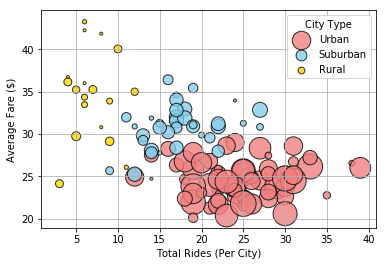

In [43]:
# Calculate Type Percents
y1=city_data_complete.loc[city_data_complete['type']=='Urban'].groupby(['city','type']).fare.mean()
y2=city_data_complete.loc[city_data_complete['type']=='Suburban'].groupby(['city','type']).fare.mean()
y3=city_data_complete.loc[city_data_complete['type']=='Rural'].groupby(['city','type']).fare.mean()

# Calculate Ride Percent
# Build Pie Chart
# Save Figure

z1=city_data_complete.loc[city_data_complete['type']=='Urban'].groupby(['city','type']).driver_count.mean()
z2=city_data_complete.loc[city_data_complete['type']=='Suburban'].groupby(['city','type']).driver_count.mean()
z3=city_data_complete.loc[city_data_complete['type']=='Rural'].groupby(['city','type']).driver_count.mean()

# Calculate Driver Percent
# Build Pie Charts
# Save Figure

x1=city_data_complete.loc[city_data_complete['type']=='Urban'].groupby(['city','type']).ride_id.count()
x2=city_data_complete.loc[city_data_complete['type']=='Suburban'].groupby(['city','type']).ride_id.count()
x3=city_data_complete.loc[city_data_complete['type']=='Rural'].groupby(['city','type']).ride_id.count()

plt.scatter(x1,y1,s=9*z1,c="lightcoral",alpha=.8,edgecolors="black",label="Urban")
plt.scatter(x2,y2,s=9*z2,c="skyblue",alpha=.8,edgecolors="black",label="Suburban")
plt.scatter(x3,y3,s=9*z3,c="gold",alpha=.8,edgecolors="black",label="Rural")
plt.legend(title="City Type")
plt.xlabel("Total Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
# Build Pie Chart

# Save Figure


In [33]:
# Show Figure
plt.show()

## Total Rides by City Type

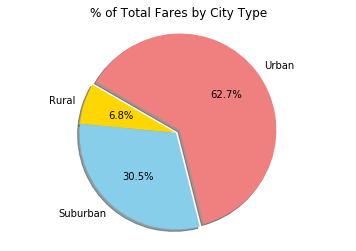

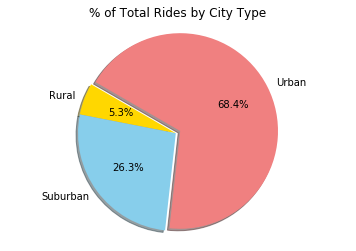

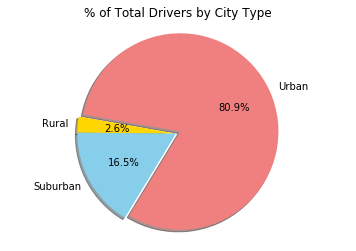

In [40]:
types_df=city_data_complete.groupby('type')
totfare_by_type=types_df.fare.sum()
tot_fares=city_data_complete.fare.sum()
prop_fares=totfare_by_type/tot_fares*100
prop_fares
prop_fares=pd.DataFrame(totfare_by_type/tot_fares*100)
pie_types=['Rural','Suburban','Urban']
colors_pie=['gold','skyblue','lightcoral']
plt.title("% of Total Fares by City Type")
plt.pie(x=prop_fares['fare'], labels=pie_types, explode= [0,0,0.05],colors= colors_pie,
      autopct="%.1f%%", shadow=True,startangle=150)
plt.axis("equal")
plt.savefig('pyber_pie_1.png')
plt.show('pyber_pie_1.png')

types_df=city_data_complete.groupby('type')
totrides_by_type=types_df.ride_id.count()
tot_rides=city_data_complete.ride_id.count()
prop_rides=totrides_by_type/tot_rides*100
prop_rides
plt.title("% of Total Rides by City Type")
plt.pie(x=prop_rides, labels=pie_types, explode= [0,0,0.05],colors= colors_pie,
      autopct="%.1f%%", shadow=True,startangle=150)
plt.axis("equal")
plt.savefig('pyber_pie_2.png')
plt.show('pyber_pie_2.png')

types_df=city_data_complete.groupby('type')
totdrivers_by_type=city_data_complete.drop_duplicates('city').groupby('type').driver_count.sum()
tot_drivers=city_data_complete.drop_duplicates('city').driver_count.sum()
prop_drivers=totdrivers_by_type/tot_drivers*100
prop_drivers
plt.title("% of Total Drivers by City Type")
plt.pie(x=prop_drivers, labels=pie_types, explode= [0,0,0.05],colors= colors_pie,
      autopct="%.1f%%", shadow=True,startangle=170)
plt.axis("equal")
plt.savefig('pyber_pie_3.png')
plt.show('pyber_pie_3.png')

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type